In [30]:
  # task 3 : choose a dataset of your own choice and apply multiple linear resgression
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
df=pd.read_excel('C:/Users/Farhan/Documents/datatab.xlsx')
df.head()

,Gender,Salary,Age,Place,Weight,Company,Academic degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master


In [31]:
print(df.keys())

Index(['Gender', 'Salary', 'Age', 'Place', 'Weight', 'Company',
       'Academic degree'],
      dtype='object')


In [32]:
df.isnull().sum()

Gender             0
Salary             0
Age                0
Place              0
Weight             0
Company            0
Academic degree    0
dtype: int64

C:\Users\Farhan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


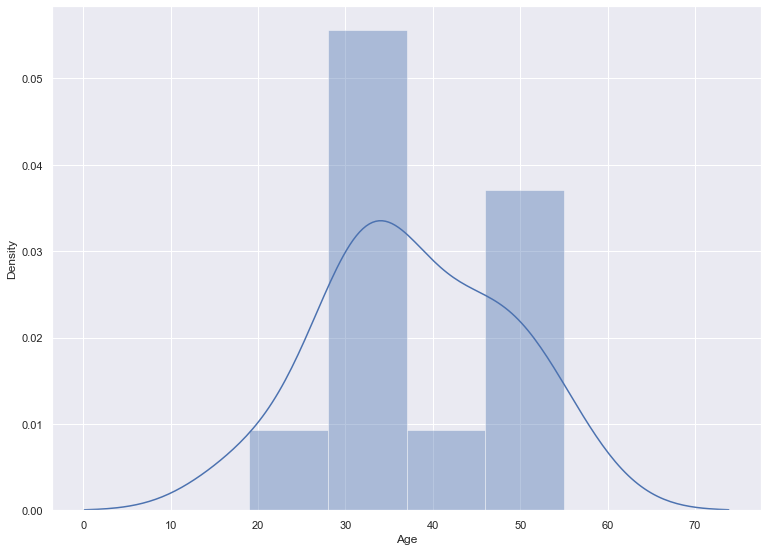

In [33]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(12.7,9.27)})
sns.distplot(df['Age'], bins=4)
plt.show()

<AxesSubplot:>

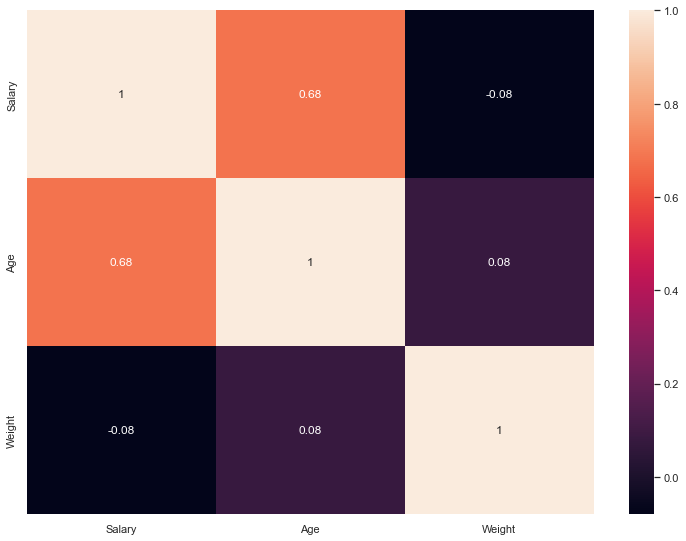

In [34]:
correlation_matrix =df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

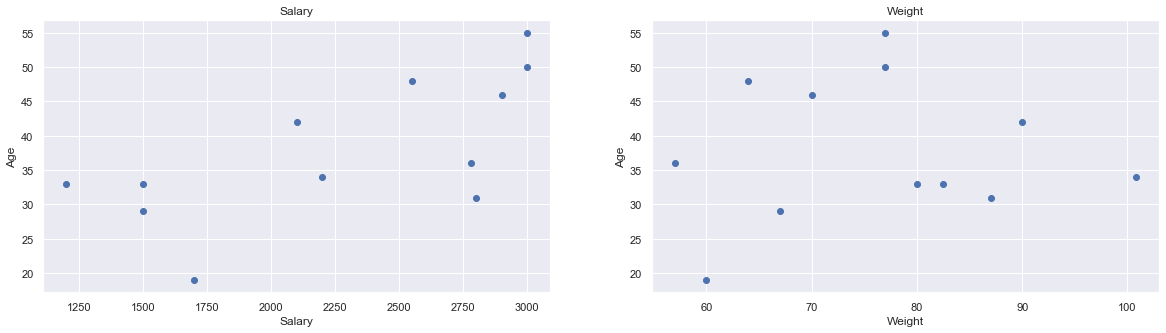

In [35]:
plt.figure(figsize=(20, 5))

features = ['Salary','Weight']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df['Age']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Age')

In [36]:
print(df.isnull().values.any())

False


In [37]:
x=df.drop(['Gender','Age','Place','Company','Academic degree'],axis=1).values
y=df['Age'].values
print(x)
print(y)

[[1500.    80. ]
 [1200.    82.5]
 [2200.   100.8]
 [2100.    90. ]
 [1500.    67. ]
 [1700.    60. ]
 [3000.    77. ]
 [3000.    77. ]
 [2800.    87. ]
 [2900.    70. ]
 [2780.    57. ]
 [2550.    64. ]]
[33 33 34 42 29 19 50 55 31 46 36 48]


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)


LinearRegression()

In [39]:
y_pred=lin_model.predict(x_test)
print(y_pred)


[44.3191885  38.18433861 28.13824126 39.57266777]


In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(x_train)
testPred = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 7.818310616831127
R2 score is 0.41074517582764325




In [41]:
y_test_predict = lin_model.predict(x_test)
rmse = (mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for testing set
--------------------------------------
RMSE is 35.531352761611906
R2 score is 0.5242664065390874


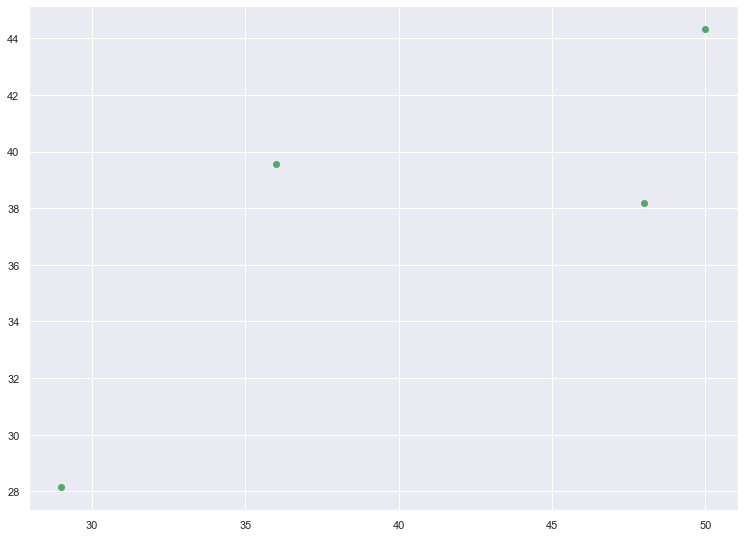

In [42]:
plt.scatter(y_test, y_test_predict,color='g')  

plt.show()


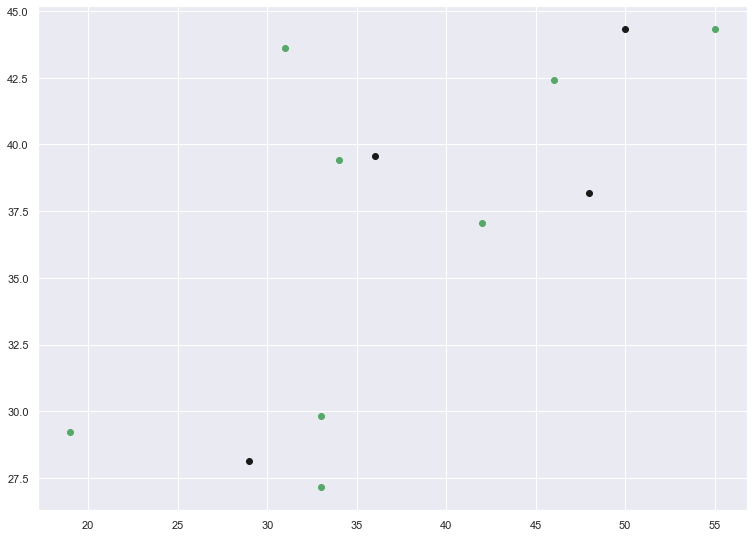

In [43]:
plt.scatter(y_train,y_train_predict,color='g')
plt.scatter(y_test,y_test_predict,color='k')
plt.show()